In [8]:
# dataset is from kaggle "shubhampatil1999/synthetic-log-data-of-distributed-system"

In [ ]:
# load the extracted dataset

In [3]:
import pandas as pd

df=pd.read_csv("Data/logdata.csv")

#print(df.head())
#print(df.columns)
print(df['Timestamp'])


0        2023-11-20T08:40:50.664842
1        2023-11-20T08:40:50.672154
2        2023-11-20T08:40:50.680263
3        2023-11-20T08:40:50.688973
4        2023-11-20T08:40:50.697002
                    ...            
99995    2023-11-20T09:04:19.566907
99996    2023-11-20T09:04:19.583197
99997    2023-11-20T09:04:19.592874
99998    2023-11-20T09:04:19.608640
99999    2023-11-20T09:04:19.624710
Name: Timestamp, Length: 100000, dtype: object


In [4]:
# Convert the Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'])




0       2023-11-20 08:40:50.664842
1       2023-11-20 08:40:50.672154
2       2023-11-20 08:40:50.680263
3       2023-11-20 08:40:50.688973
4       2023-11-20 08:40:50.697002
                   ...            
99995   2023-11-20 09:04:19.566907
99996   2023-11-20 09:04:19.583197
99997   2023-11-20 09:04:19.592874
99998   2023-11-20 09:04:19.608640
99999   2023-11-20 09:04:19.624710
Name: Timestamp, Length: 100000, dtype: datetime64[ns]


In [5]:
# Sort data by Timestamp
df = df.sort_values('Timestamp')

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

In [6]:
#  The TimeTaken column contains the execution time in milliseconds as strings (e.g., '28ms').
# We use .str.replace('ms', '') to remove the 'ms' part and then convert the resulting string
# to a float type. This step prepares the TimeTaken column for numerical operations like
# statistical analysis and anomaly detection.

df['TimeTaken']=df['TimeTaken'].astype(str).str.replace('ms',' ').astype(float)
print(df['TimeTaken'])

Timestamp
2023-11-20 08:40:50.664842    28.0
2023-11-20 08:40:50.672154    55.0
2023-11-20 08:40:50.680263    44.0
2023-11-20 08:40:50.688973    72.0
2023-11-20 08:40:50.697002    56.0
                              ... 
2023-11-20 09:04:19.566907    32.0
2023-11-20 09:04:19.583197    50.0
2023-11-20 09:04:19.592874    12.0
2023-11-20 09:04:19.608640    90.0
2023-11-20 09:04:19.624710    86.0
Name: TimeTaken, Length: 100000, dtype: float64


In [7]:
# Visualizing the TIMETAKEN Data

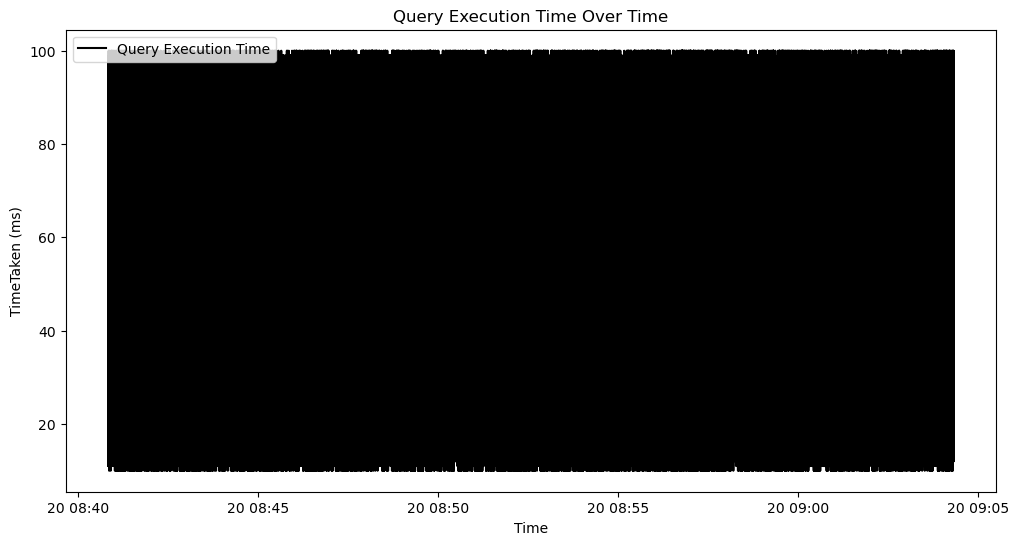

In [11]:
import matplotlib.pyplot as plt

# Plot TimeTaken over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['TimeTaken'], label="Query Execution Time", color='black')
plt.xlabel('Time')
plt.ylabel('TimeTaken (ms)')
plt.title('Query Execution Time Over Time')
plt.legend()
plt.show()


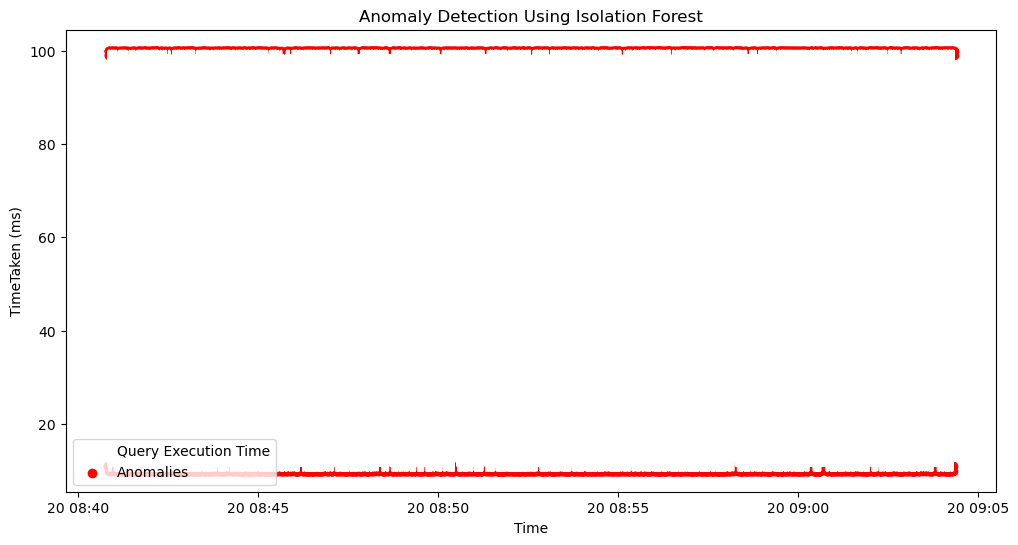

In [19]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination to match expected anomaly rate
df['anomaly'] = iso_forest.fit_predict(df[['TimeTaken']])

# Convert -1 (anomaly) to 1, and 1 (normal) to 0
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Filter anomalies
anomalies = df[df['anomaly'] == 1]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['TimeTaken'], label="Query Execution Time", color='white')
plt.scatter(anomalies.index, anomalies['TimeTaken'], color='red', label="Anomalies")
plt.xlabel('Time')
plt.ylabel('TimeTaken (ms)')
plt.title('Anomaly Detection Using Isolation Forest')
plt.legend()
plt.show()


In [20]:
# Save anomalies to a CSV file
anomalies.to_csv("detected_anomalies.csv", index=True)

# Optionally, print the first few anomalies
print(anomalies.head())


                            Unnamed: 0 LogLevel   Service  \
Timestamp                                                   
2023-11-20 08:40:50.729253           7  WARNING  ServiceB   
2023-11-20 08:40:51.057095          30    DEBUG  ServiceC   
2023-11-20 08:40:51.289243          46    FATAL  ServiceC   
2023-11-20 08:40:51.660780          71    ERROR  ServiceC   
2023-11-20 08:40:51.796185          81    DEBUG  ServiceD   

                                         Message  RequestID    User  \
Timestamp                                                             
2023-11-20 08:40:50.729253  Performance Warnings       2061  User15   
2023-11-20 08:40:51.057095     Trace Information       7677  User17   
2023-11-20 08:40:51.289243               Crashes       1569   User3   
2023-11-20 08:40:51.660780       Database Errors       5445  User31   
2023-11-20 08:40:51.796185              File I/O       9059  User24   

                                 ClientIP  TimeTaken  anomaly   z_score  


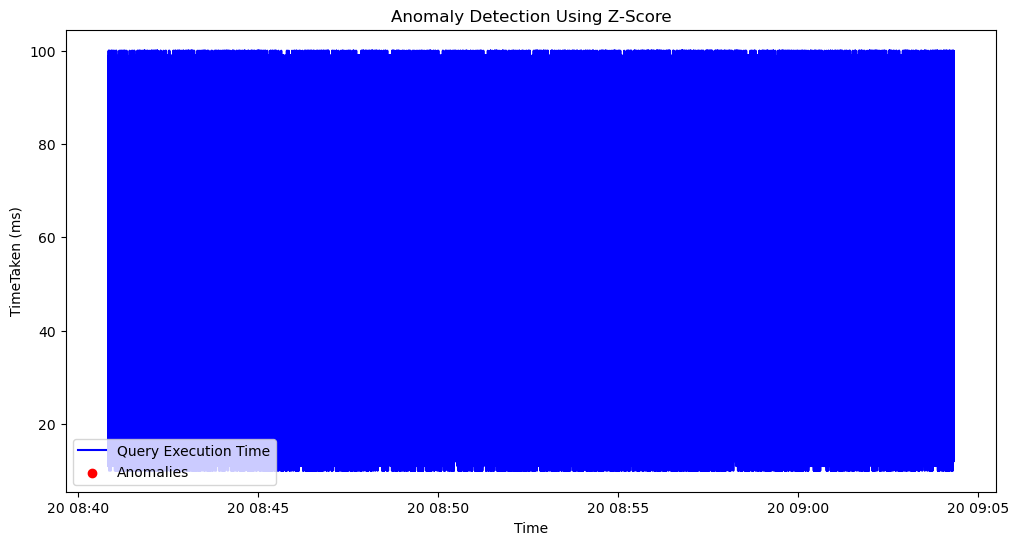

In [17]:
import numpy as np

# Compute Z-score for TimeTaken
df['z_score'] = (df['TimeTaken'] - df['TimeTaken'].mean()) / df['TimeTaken'].std()

# Set threshold for anomaly detection (Z-score > 3 or < -3)
threshold = 3
df['anomaly'] = df['z_score'].apply(lambda x: 1 if np.abs(x) > threshold else 0)

# Filter anomalies
anomalies = df[df['anomaly'] == 1]

# Plot anomalies
plt.figure(figsize=(12,6))
plt.plot(df.index, df['TimeTaken'], label="Query Execution Time", color='blue')
plt.scatter(anomalies.index, anomalies['TimeTaken'], color='red', label="Anomalies")
plt.xlabel('Time')
plt.ylabel('TimeTaken (ms)')
plt.title('Anomaly Detection Using Z-Score')
plt.legend()
plt.show()
